# Assignment 9: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/udaylunawat/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm_notebook

from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import joblib

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
def roc_auc_pipe(clf, X_train, X_test, y_train, y_test, title):
  y_train_pred = clf.predict_proba(X_train)[:,1]
  y_test_pred = clf.predict_proba(X_test)[:,1]
      
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

  plt.close
  plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
  plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
  plt.legend()
  plt.plot([0, 1], [0, 1],'g--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.xlabel("False Positive Rate(FPR)")
  plt.ylabel("True Positive Rate(TPR)")
  plt.title(title)
  plt.grid()
  plt.show()

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [4]:
#Mounting drive work folder
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [5]:
#drive folder
# %cd /content/drive/My Drive/Appliedai colab/Assignment 9 - Decision tree on donor\'s choose

%cd /demo-mount/donors choose data

/demo-mount/donors choose data


In [156]:
data = pd.read_csv('preprocessed_final.csv', nrows = 50000, index_col = "Unnamed: 0") #reading locally using pandas
data = data.drop(["teacher_id", "std_price", "nrm_price"], axis = 1)
data.head(5)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,price,quantity
0,mrs,in,grades_prek_2,literacy_language,esl_literacy,Educational Support for English Learners at Home,My students need opportunities to practice beg...,0,0,My students are English learners that are work...,154.60,23
1,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,Wanted: Projector for Hungry Learners,My students need a projector to help with view...,7,1,Our students arrive to our school eager to lea...,299.00,1
2,ms,az,grades_6_8,health_sports,health_wellness_teamsports,Soccer Equipment for AWESOME Middle School Stu...,"My students need shine guards, athletic socks,...",1,0,"\r\n\""True champions aren't always the ones th...",516.85,22
3,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,Techie Kindergarteners,My students need to engage in Reading and Math...,4,1,I work at a unique school filled with both ESL...,232.90,4
4,mrs,tx,grades_prek_2,math_science,mathematics,Interactive Math Tools,My students need hands on practice in mathemat...,1,1,Our second grade classroom next year will be m...,67.98,4


In [106]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Feature Set 1 - TFIDF

In [9]:
%%time
#https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
#https://stackoverflow.com/a/54704747/9292995

numeric_features = ['teacher_number_of_previously_posted_projects', 'price', 'quantity']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['school_state', 'teacher_prefix', 'project_grade_category','project_subject_categories','project_subject_subcategories']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# text_features = ['essay','project_title']
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words = 'english', min_df = 10))])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('essay', text_transformer, "essay"),
        ('title', text_transformer, "project_title"),
        ('resource', text_transformer, "project_resource_summary")]
        ,n_jobs=-1, verbose=True, remainder = 'drop'
            )

CPU times: user 202 µs, sys: 27 µs, total: 229 µs
Wall time: 233 µs


In [10]:
%%time
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',  DecisionTreeClassifier())])

clf.fit(X_train, y_train)
print("model test accuracy score: %.3f" % clf.score(X_test, y_test))

model test accuracy score: 0.768
CPU times: user 1min 52s, sys: 572 ms, total: 1min 52s
Wall time: 1min 59s


In [11]:
print("model train accuracy score: %.3f" % clf.score(X_train, y_train))

model train accuracy score: 1.000


In [12]:
%%time
cv = KFold(3)

param_grid = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__min_samples_split' : [10,100,200,500]
}

grid_search = GridSearchCV(clf, param_grid, cv = cv, verbose = 5, n_jobs = -1, return_train_score = True, scoring = "roc_auc", refit = True)
grid_search.fit(X_train, y_train)

print(("best AUC score from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  48 | elapsed:  1.0min remaining:   47.3s
[Parallel(n_jobs=-1)]: Done  37 out of  48 | elapsed:  1.5min remaining:   26.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.5min finished


best AUC score from grid search: 0.659
CPU times: user 16.8 s, sys: 5.9 s, total: 22.7 s
Wall time: 1min 46s


## **These are the best parameters**

In [13]:
grid_search.best_params_

{'classifier__max_depth': 7, 'classifier__min_samples_split': 500}

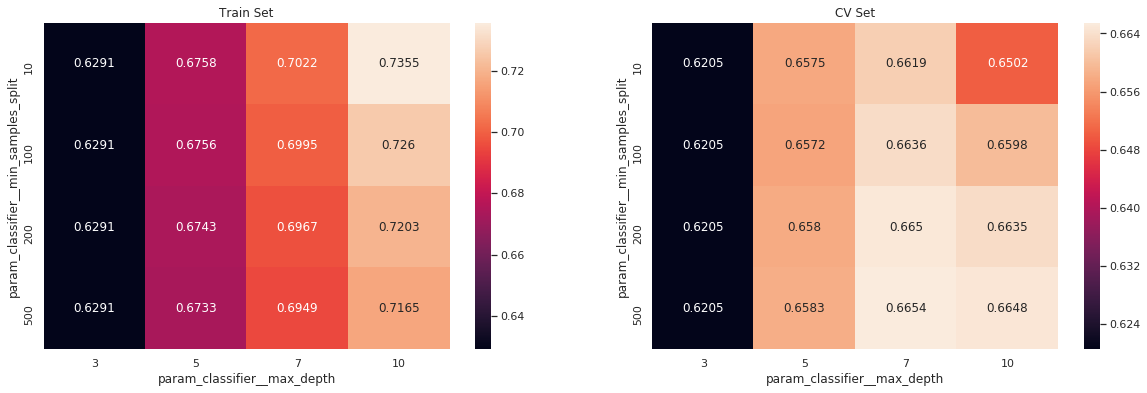

In [14]:
sns.set()
max_scores1 = pd.DataFrame(grid_search.cv_results_).groupby(['param_classifier__min_samples_split', 'param_classifier__max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [15]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
# Utility function to report best scores
from time import time
start = time()
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean test score: {0:.8f} (std: {1:.8f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
report(grid_search.cv_results_)

Model with rank: 1
Mean test score: 0.66542438 (std: 0.00657891)
Parameters: {'classifier__max_depth': 7, 'classifier__min_samples_split': 500}

Model with rank: 2
Mean test score: 0.66500919 (std: 0.00704719)
Parameters: {'classifier__max_depth': 7, 'classifier__min_samples_split': 200}

Model with rank: 3
Mean test score: 0.66480481 (std: 0.00883169)
Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 500}

Model with rank: 4
Mean test score: 0.66361360 (std: 0.00764857)
Parameters: {'classifier__max_depth': 7, 'classifier__min_samples_split': 100}

Model with rank: 5
Mean test score: 0.66350521 (std: 0.00994237)
Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 200}



# Training model using best hyperparameter value

In [16]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.572599,0.269471,5.017182,0.031890,3,10,"{'classifier__max_depth': 3, 'classifier__min_...",0.604238,0.653160,0.604126,0.620508,0.023089,13,0.618243,0.651051,0.618113,0.629136,0.015497
1,10.700035,0.042584,5.018095,0.050161,3,100,"{'classifier__max_depth': 3, 'classifier__min_...",0.604238,0.653160,0.604126,0.620508,0.023089,13,0.618243,0.651051,0.618113,0.629136,0.015497
2,11.006366,0.136507,5.028333,0.057607,3,200,"{'classifier__max_depth': 3, 'classifier__min_...",0.604238,0.653160,0.604126,0.620508,0.023089,13,0.618243,0.651051,0.618113,0.629136,0.015497
3,11.366750,0.113202,4.967550,0.048302,3,500,"{'classifier__max_depth': 3, 'classifier__min_...",0.604238,0.653160,0.604090,0.620496,0.023097,16,0.618243,0.651051,0.618101,0.629132,0.015500
4,12.636094,0.065231,5.023531,0.044669,5,10,"{'classifier__max_depth': 5, 'classifier__min_...",0.646335,0.669745,0.656561,0.657547,0.009582,10,0.673458,0.683140,0.670672,0.675757,0.005343
5,12.567452,0.185562,5.012261,0.061256,5,100,"{'classifier__max_depth': 5, 'classifier__min_...",0.645404,0.669306,0.656946,0.657219,0.009760,11,0.673545,0.683140,0.670195,0.675627,0.005486
6,12.566864,0.062778,4.959493,0.008940,5,200,"{'classifier__max_depth': 5, 'classifier__min_...",0.646756,0.669436,0.657671,0.657954,0.009261,9,0.671930,0.683140,0.667761,0.674277,0.006494
7,12.489195,0.222003,4.915290,0.056907,5,500,"{'classifier__max_depth': 5, 'classifier__min_...",0.647638,0.669841,0.657568,0.658349,0.009081,8,0.669495,0.683140,0.667361,0.673332,0.006990
8,14.213128,0.071576,4.981744,0.033715,7,10,"{'classifier__max_depth': 7, 'classifier__min_...",0.651051,0.672417,0.662317,0.661928,0.008727,6,0.702886,0.704429,0.699169,0.702161,0.002208
9,13.908511,0.155441,5.035855,0.059869,7,100,"{'classifier__max_depth': 7, 'classifier__min_...",0.654369,0.673099,0.663373,0.663614,0.007649,4,0.698423,0.702685,0.697482,0.699530,0.002264


In [17]:
print("Grid search mean AUC score for test: %.3f" % grid_search.best_score_)

Grid search mean AUC score for test: 0.665


In [18]:
best_clf_TFIDF = Pipeline(steps=[('preprocessor', preprocessor), ('classifier',  DecisionTreeClassifier(max_depth = 10, min_samples_split =500))])

best_clf_TFIDF.fit(X_train, y_train)
print("model accuracy score: %.3f" % best_clf_TFIDF.score(X_train, y_train))

model accuracy score: 0.852


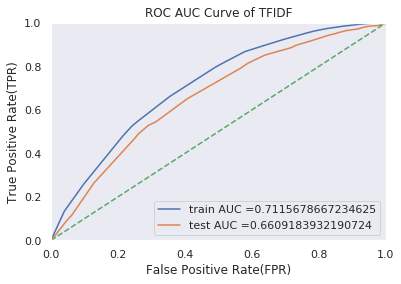

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
roc_auc_pipe(best_clf_TFIDF, X_train, X_test, y_train, y_test, "ROC AUC Curve of TFIDF")

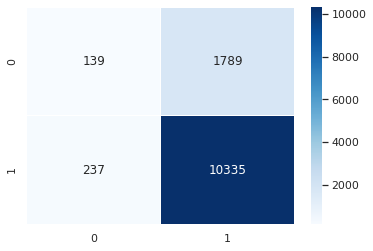

In [20]:
y_pred = best_clf_TFIDF.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,  annot=True,  cmap = 'Blues', fmt = 'g', linewidths=.5);

## Word cloud of False positive words

In [21]:
y_pred = best_clf_TFIDF.predict(X_test)
X_test_price = X_test['price'].values
X_test_words = X_test["essay"].values
X_test_prev = X_test["teacher_number_of_previously_posted_projects"].values

In [22]:
# https://stackoverflow.com/a/36184549/9292995
fp_points=[]
words = []
price_list = []
prev_projects = []
for i in range(len(y_test)):
    if (int((y_test[i]) == 0) and (int(y_pred[i]) == 1)):
        fp_points.append(i)
        words.append(X_test_words[i])
        price_list.append(X_test_price[i])
        prev_projects.append(X_test_prev[i])

In [23]:
print("Number of words matches the false positive data points:",len(words))

Number of words matches the false positive data points: 1789


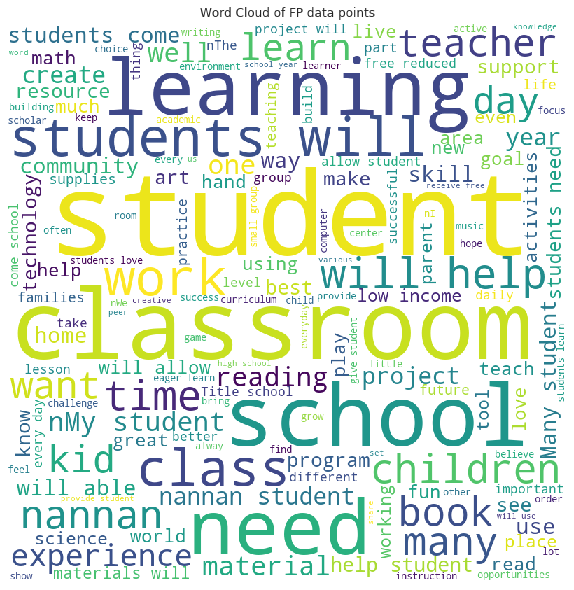

In [24]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
wordcorpus = ' '.join(words)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(wordcorpus) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("Word Cloud of FP data points")
plt.tight_layout(pad = 0)
plt.show() 

### Box plot with the `price` of the `false positive data points`

In [25]:
y_status=[]
for i in range(0,len(y_test)):
    for j in fp_points:
        if(i==j):
            y_status.append(y_test[i])

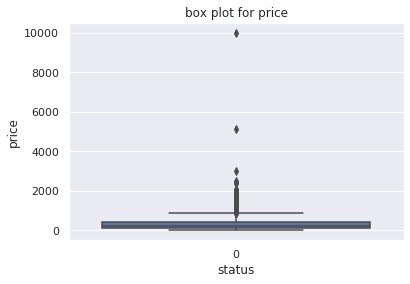

In [26]:
price_df = pd.DataFrame( {'price': price_list,'status': y_status})
plt.title("box plot for price")
sns.boxplot(x='status',y='price', data=price_df);

### PDF with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

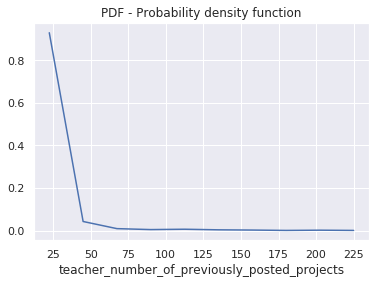

In [27]:
counts, bin_edges = np.histogram(prev_projects, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
axes = plt.gca()
cdf = np.cumsum(pdf)
plt.xlabel("teacher_number_of_previously_posted_projects")
plt.title("PDF - Probability density function")
plt.plot(bin_edges[1:],pdf);

### Task 2: 

For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using 'feature_importances_` (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3
Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.

In [28]:
#Array with index of features with non-zero feature importance
nonzero = np.nonzero(clf.named_steps['classifier'].feature_importances_)[0]

In [29]:
X_encoded = preprocessor.fit_transform(X)

In [30]:
X_encoded_feat = X_encoded[:,nonzero]

In [31]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('classifier',  DecisionTreeClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X_encoded_feat, y, test_size=0.25, stratify=y)
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('classifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

In [ ]:
%%time
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__min_samples_split' : [10,100,200,500]
}
gs = GridSearchCV(clf, param_grid, cv = 3, n_jobs = -1, \
                  verbose=3, return_train_score = True, scoring = "roc_auc", refit = True)
gs.fit(X_train, y_train)
print(("best AUC score from grid search: %.3f"
       % gs.score(X_test, y_test)))

In [ ]:
gs.param_grid

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
# Utility function to report best scores
from time import time
start = time()
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean test score: {0:.8f} (std: {1:.8f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(gs.cv_results_)

In [ ]:
results = pd.DataFrame(gs.cv_results_)
results

In [ ]:
#Heatmaps
sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_classifier__max_depth', 'param_classifier__min_samples_split']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0], cmap = 'Blues')
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1], cmap = 'Blues')
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

# Feature Set 2 - TFIDF W2V

#### TFIDF W2V - preprocessed_essays

In [37]:
preprocessed_essays = data['essay'].values

In [38]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [39]:
open("glove_vectors","rb")
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [40]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm_notebook(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays.append(vector)

print(len(tfidf_w2v_essays))
print(len(tfidf_w2v_essays[0]))


50000
300


# TFIDF W2V - preprocessed_titles

In [41]:
preprocessed_titles = data['project_title'].values

In [42]:
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [43]:
# average Word2Vec for titles
# compute average word2vec for each title.
tfidf_w2v_titles = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm_notebook(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles.append(vector)

print(len(tfidf_w2v_titles))
print(len(tfidf_w2v_titles[0]))


50000
300


## processed_resource_summary

In [118]:
preprocessed_summary = data['project_resource_summary'].values

In [119]:
tfidf_model.fit(preprocessed_summary)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [122]:
# average Word2Vec for titles
# compute average word2vec for each title.
tfidf_w2v_summary = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm_notebook(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_summary.append(vector)

print(len(tfidf_w2v_summary))
print(len(tfidf_w2v_summary[0]))


50000
300


## Concatenating all features

In [123]:
%%time
tfidf_w2v_essays_dataframe = pd.DataFrame(tfidf_w2v_essays)
tfidf_w2v_titles_dataframe = pd.DataFrame(tfidf_w2v_titles)
tfidf_w2v_summary_dataframe = pd.DataFrame(tfidf_w2v_summary)

CPU times: user 26.9 s, sys: 1.51 s, total: 28.4 s
Wall time: 28.4 s


In [139]:
%%time
#https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
#https://stackoverflow.com/a/54704747/9292995

numeric_features = ['teacher_number_of_previously_posted_projects', 'price', 'quantity']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['school_state', 'teacher_prefix', 'project_grade_category','project_subject_categories','project_subject_subcategories']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)]
        ,n_jobs=-1, verbose=True, remainder = 'passthrough'
            )

CPU times: user 175 µs, sys: 9 µs, total: 184 µs
Wall time: 191 µs


In [158]:
data_new = data.drop(['essay', 'project_title', 'project_resource_summary', 'project_is_approved'], axis =1)

In [159]:
merge1 = pd.concat([data_new, tfidf_w2v_essays_dataframe], axis=1)
merge2 = pd.concat([merge1, tfidf_w2v_titles_dataframe], axis=1)
merge3 = pd.concat([merge1, tfidf_w2v_summary_dataframe], axis=1)

In [172]:
X_traine, X_teste, y_traine, y_teste = train_test_split(merge3, y, test_size=0.25, stratify=y)

In [160]:
%%time
clf = Pipeline(steps=[('preprocessor',preprocessor),('classifier',  DecisionTreeClassifier(random_state=42))])
clf.fit(X_traine, y_traine)
clf.score(X_teste, y_teste)

CPU times: user 1min 18s, sys: 1.24 s, total: 1min 19s
Wall time: 1min 18s


0.7408

In [161]:
%%time
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__min_samples_split' : [10,100,200,500]
}
grid_search = GridSearchCV(clf, param_grid, cv=3, verbose=3, n_jobs = -1, return_train_score = True, scoring = "roc_auc")
grid_search.fit(X_traine, y_traine)

print(("best decision tree from grid search: %.3f"
       % grid_search.score(X_teste, y_teste)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  48 | elapsed:   50.1s remaining:   20.6s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.1min finished


best decision tree from grid search: 0.661
CPU times: user 18.1 s, sys: 596 ms, total: 18.7 s
Wall time: 1min 22s


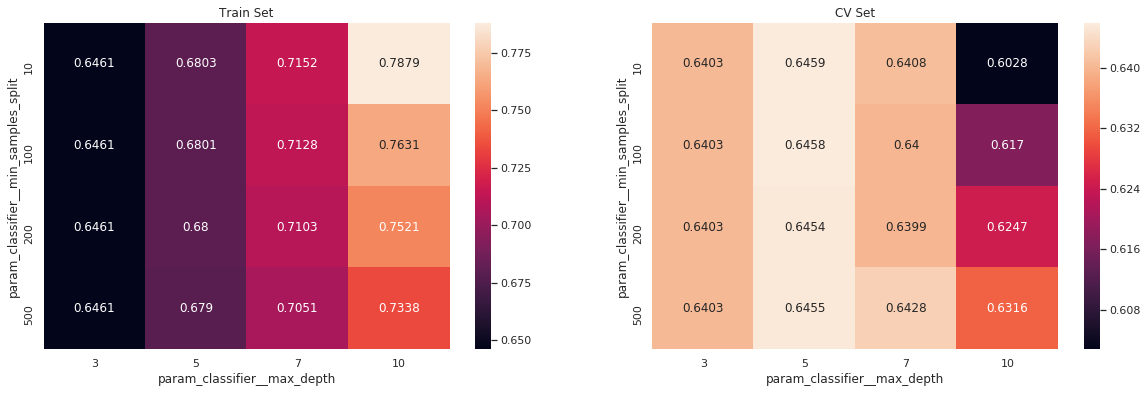

In [162]:
sns.set()
max_scores1 = pd.DataFrame(grid_search.cv_results_).groupby(['param_classifier__min_samples_split', 'param_classifier__max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [166]:
%%time
best_clf_TFIDF_W2V = Pipeline(steps=[('preprocessor',preprocessor),('classifier',  DecisionTreeClassifier(class_weight='balanced',max_depth=5, min_samples_split= 10))])
best_clf_TFIDF_W2V.fit(X_traine, y_traine)
best_clf_TFIDF_W2V.score(X_teste, y_teste)

CPU times: user 17.4 s, sys: 474 ms, total: 17.9 s
Wall time: 19.2 s


0.51344

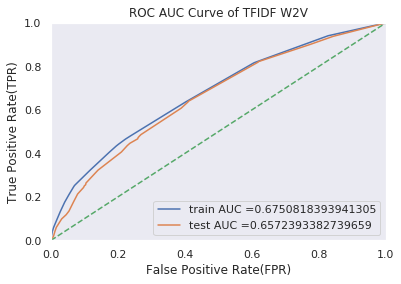

In [167]:
roc_auc_pipe(best_clf_TFIDF_W2V, X_train, X_test, y_train, y_test, "ROC AUC Curve of TFIDF W2V")

## Word cloud of False positive words

In [173]:
y_pred = best_clf_TFIDF_W2V.predict(X_teste)
X_test_price = X_test['price'].values
X_test_words = X_test["essay"].values
X_test_prev = X_test["teacher_number_of_previously_posted_projects"].values

In [174]:
# https://stackoverflow.com/a/36184549/9292995
fp_points=[]
words = []
price_list = []
prev_projects = []
for i in range(len(y_test)):
    if (int((y_test[i]) == 0) and (int(y_pred[i]) == 1)):
        fp_points.append(i)
        words.append(X_test_words[i])
        price_list.append(X_test_price[i])
        prev_projects.append(X_test_prev[i])

In [175]:
print("Number of words matches the false positive data points:",len(words))

Number of words matches the false positive data points: 838


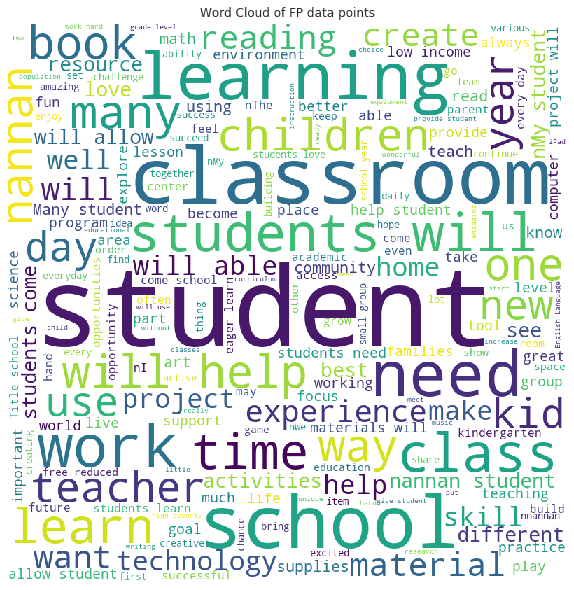

In [176]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
wordcorpus = ' '.join(words)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(wordcorpus) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("Word Cloud of FP data points")
plt.tight_layout(pad = 0)
plt.show() 

### Box plot with the `price` of the `false positive data points`

In [177]:
y_status=[]
for i in range(0,len(y_test)):
    for j in fp_points:
        if(i==j):
            y_status.append(y_test[i])

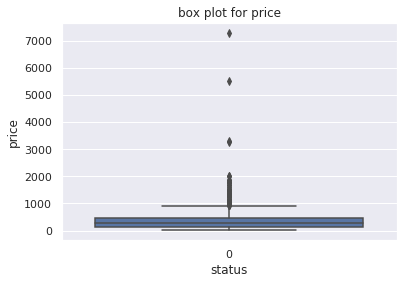

In [178]:
price_df = pd.DataFrame( {'price': price_list,'status': y_status})
plt.title("box plot for price")
sns.boxplot(x='status',y='price', data=price_df);

### PDF with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

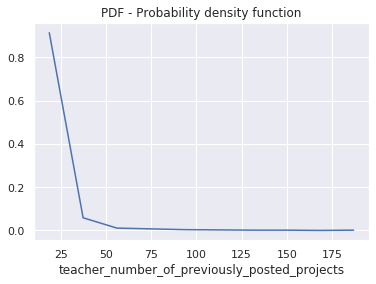

In [179]:
counts, bin_edges = np.histogram(prev_projects, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
axes = plt.gca()
cdf = np.cumsum(pdf)
plt.xlabel("teacher_number_of_previously_posted_projects")
plt.title("PDF - Probability density function")
plt.plot(bin_edges[1:],pdf);

In [180]:
from prettytable import PrettyTable
t = PrettyTable(['Vectorizer', 'Model','max_depth','min_samples_split','AUC'])
t.add_row(['TFIDF', 'Decision tree', 10, 500, 0.660])
t.add_row(['TFIDF_W2V', 'Decision tree', 5, 10, 0.657])
print(t)

+------------+---------------+-----------+-------------------+-------+
| Vectorizer |     Model     | max_depth | min_samples_split |  AUC  |
+------------+---------------+-----------+-------------------+-------+
|   TFIDF    | Decision tree |     10    |        500        |  0.66 |
| TFIDF_W2V  | Decision tree |     5     |         10        | 0.657 |
+------------+---------------+-----------+-------------------+-------+
